In [318]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp, kruskal, anderson_ksamp

### 1) Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однород- ность 𝑡–критерием Стьюдента против двусторонней гипотезы. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую).

In [23]:
# Просто применяем критерий Стьюдента, который сравнивает мат ожидания
# И смотрим на p-value
# Если оно достаточно большое, то принимаем гипотезу
# Но это не очень наглядно

alpha = 0.05

x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(0, 1, 50)

x3 = np.random.normal(0.2, 1, 50)

x4 = np.random.uniform(0, 1, 50)
x5 = np.random.uniform(0, 1.1, 50)

res1 = ttest_ind(x1, x2)
res2 = ttest_ind(x1, x3)
res3 = ttest_ind(x4, x5)

if res1[1] > alpha:
    print(f"Не отвергаем гипотезу {res1[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res1[1]} < {alpha}")
    
if res2[1] > alpha:
    print(f"Не отвергаем гипотезу {res2[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res2[1]} < {alpha}")
    
if res3[1] > alpha:
    print(f"Не отвергаем гипотезу {res3[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res3[1]} < {alpha}")

Не отвергаем гипотезу 0.7821718425828783 > 0.05
Не отвергаем гипотезу 0.4433522028358443 > 0.05
Не отвергаем гипотезу 0.4823955091411505 > 0.05


In [73]:
# Также для наглядности можно простроить гистограмму p_value
# Если получается что-то равномерное, то НЕ отвергаем нулевую гипотезу

pvalues_1 = []
pvalues_2 = []
pvalues_3 = []

for i in range(10000):
    x1 = np.random.normal(0, 1, 50)
    x2 = np.random.normal(0, 1, 50)
    
    x3 = np.random.normal(0.2, 1, 50)
    
    x4 = np.random.uniform(0, 1, 50)
    x5 = np.random.uniform(0, 1.1, 50)
    
    pvalues_1.append(ttest_ind(x1, x2)[1])
    pvalues_2.append(ttest_ind(x1, x3)[1])
    pvalues_3.append(ttest_ind(x4, x5)[1])

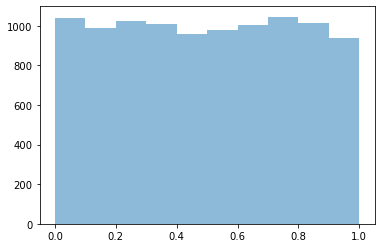

In [74]:
plt.hist(pvalues_1, alpha = 0.5)
plt.show()

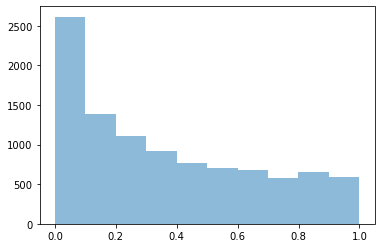

In [75]:
plt.hist(pvalues_2, alpha = 0.5)
plt.show()

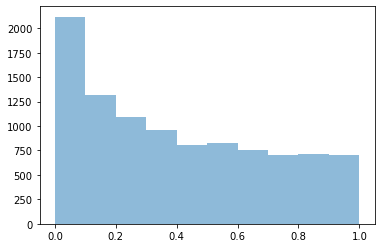

In [76]:
plt.hist(pvalues_3, alpha = 0.5)
plt.show()

### 2. Генерируйте выборки объема 𝑛 = 50 из 𝒩(0,1) (первую) и 𝒩(0,1) (вторую). Проверьте их од- нородность критерием Баумгартнера–Вейсса–Шиндлера. Теперь то же для выборок из 𝒩(0,1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую).

In [282]:
def get_ranks(merged_lst, lst):
    indices = []
    
    for i in range(len(merged_lst)):
        if merged_lst[i] in lst:
            indices.append(i)
            
    return indices

In [283]:
def get_B(sample1, sample2):
    merged_sample = []
    
    # Смешиваем выборку
    for element in sample1:
        merged_sample.append(element)
        
    for element in sample2:
        merged_sample.append(element)
    
    # Делаем вариационный ряд (сортируем)
    merged_sample.sort()
    
    # Получаем ранги (индексы вхождения элементов первой выборки в общей и наоборот)
    R = get_ranks(merged_sample, sample2)  # индексы второй выборки
    S = get_ranks(merged_sample, sample1)  # индексы первой выборки
    
    n = len(sample1)
    m = len(sample2)

    i = list(range(1, n + 1))
    j = list(range(1, m + 1))

    Bx = 1/n * np.sum((np.power(S - (n+m)*np.arange(1, n+1)/n, 2))/(np.arange(1, n+1)/(n+1) * (1 - np.arange(1, n+1)/(n+1)) * m*(n+m)/n))
    By = 1/m * np.sum((np.power(R - (n+m)*np.arange(1, m+1)/m, 2))/(np.arange(1, m+1)/(m+1) * (1 - np.arange(1, m+1)/(m+1)) * n*(n+m)/m))

    B = (Bx + By)/2
    
    return B

In [284]:
# Видно, что при одинаковых распределениях маленький B, при разных больше

norm1 = np.random.normal(0, 1, 50)
norm2 = np.random.normal(0, 1, 50)
unif = np.random.uniform(1, 10, 50)

print(get_B(norm1, norm2))
print(get_B(norm1, unif))

1.5683696144329513
76.35359429770376


### 3) Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однород- ность критерием Колмогорова–Смирнова. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую)

In [44]:
# тут то же самое что и в задании 1, но решил что графики сюда не буду добавлять
# но делаются они аналогично

alpha = 0.05

x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(0, 1, 50)

x3 = np.random.normal(0.2, 2, 50)

x4 = np.random.uniform(0,1,50)
x5 = np.random.uniform(0,1.1,50)

p_value1 = ks_2samp(x1, x2)[1]
p_value2 = ks_2samp(x1, x3)[1]
p_value3 = ks_2samp(x4, x5)[1]

print(p_value1)
print(p_value2)
print(p_value3)

0.8692618870414056
0.039194586195352224
0.7166468440414822


### 4. Генерируйте пять выборок из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0, 1) объема 100. Исследуйте их на равенство средних методом Краскера–Уоллиса. Проделайте то же для пяти выборок, где первые четыре из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0,1), а пятая из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0.5,1). Теперь для пяти выборок из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(𝑖/10,1), 𝑖 = 1,...,5. И наконец, для пяти выборок, где первые четыре из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0, 1), а пятая из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0.5, 2)

In [46]:
# Такое же задание как и 1, только проверяем множество выборок на однородность
# Соответственно с помощью другого критерия
# При желании можно и сделать графики p-value для наглядности

from scipy.stats import kruskal

x1 = np.random.laplace(0, 1, 100)
x2 = np.random.laplace(0, 1, 100)
x3 = np.random.laplace(0, 1, 100)
x4 = np.random.laplace(0, 1, 100)
x5 = np.random.laplace(0, 1, 100)

y1 = np.random.laplace(0.1, 1, 100)
y2 = np.random.laplace(0.2, 1, 100)
y3 = np.random.laplace(0.3, 1, 100)
y4 = np.random.laplace(0.4, 1, 100)
y5 = np.random.laplace(0.5, 1, 100)

x6 = np.random.laplace(0.5, 1, 100)
x7 = np.random.laplace(0.5, 2, 100)

p_value1 = kruskal(x1, x2, x3, x4, x5)[1]
print('1:', p_value1)
print()

p_value2 = kruskal(x1, x2, x3, x4, x6)[1]
print('2:', p_value2)
print()

p_value3 = kruskal(y1, y2, y3, y4, y5)[1]
print('3:', p_value3)
print()

p_value4 = kruskal(x1, x2, x3, x4, x7)[1]
print('4:', p_value4)

1: 0.8802123620391749

2: 0.03165533011346415

3: 0.030096301798251093

4: 0.2796646189751877


### 6. В файле Pottery.txt содержится информация о содержании химических элементов в изделиях трех различных культур. Исследовать выборки а) на однородность б) на равенство средних. Произвести покомпонентный визуальный анализ.

In [287]:
with open("Pottery.txt") as file:
    for line in file:
    

IndentationError: expected an indented block (699075107.py, line 3)

### 7. В файле Memory.txt содержится информация об исследовании памяти у молодых и пожилых лю- дей. Каждому участнику давали одно из пяти упражнений: а) Counting – подсчитать число букв в каждом из слов б) Rhyming – придумать рифму к каждому из слов в) Adjective – подобрать прилагательное к каждому слову г) Imagery – представить изображение предмета д) Intentional – запомнить слова. После 27 таких слов участников попросили вспомнить слова. В таблице при- ведено количество успехов в каждом из испытаний. Проверить гипотезу о том, что а) возраст б) вид упражнения не влияет на успешность прохождения теста. Построить boxplot для визуальной проверки.

In [306]:
younger = []
older = []

with open("Memory.txt") as file:
    first_row = file.readline()
    for line in file:
        temp = line.split()
        
        if temp[0] == "Younger":
            younger.append(float(temp[2]))
        else:
            older.append(float(temp[2]))

In [314]:
# Проверим выборки на однородность

alpha = 0.05

pvalue = ks_2samp(younger, older)[1]

if pvalue > alpha:
    print("Выборки однороды => возраст не влияет")
    print(f"{pvalue} > {alpha}")
else:
    print("Выборки неоднородны => возраст влияет")
    print(f"{pvalue} < {alpha}")

Выборки неоднородны => возраст влияет
0.002834980581320342 < 0.05


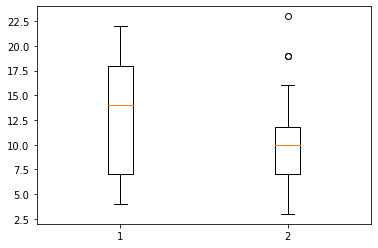

In [330]:
data1 = [younger, older]
plt.boxplot(data1)
plt.show()

In [333]:
counting = []
rhyming = []
adjective = []
imagery = []
intentional = []

with open("Memory.txt") as file:
    first_row = file.readline()
    for line in file:
        temp = line.split()
        
        if temp[1] == "Counting":
            counting.append(float(temp[2]))
        elif temp[1] == "Rhyming":
            rhyming.append(float(temp[2]))
        elif temp[1] == "Adjective":
            adjective.append(float(temp[2]))
        elif temp[1] == "Imagery":
            imagery.append(float(temp[2]))
        else:
            intentional.append(float(temp[2]))

In [334]:
pvalue = anderson_ksamp([counting, rhyming, adjective, imagery, intentional])[2]

if pvalue > alpha:
    print("Выборки однородны => задание не влияет")
    print(f"{pvalue} > {alpha}")
else:
    print("Выборки не однородны => задание влияет")
    print(f"{pvalue} < {alpha}")

Выборки не однородны => задание влияет
0.001 < 0.05


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_55117/1462237917.py:1: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([counting, rhyming, adjective, imagery, intentional])[2]


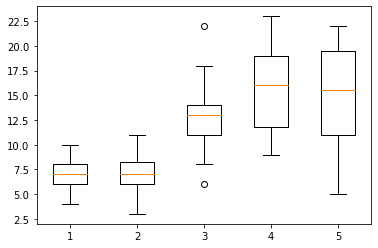

In [335]:
data2 = [counting, rhyming, adjective, imagery, intentional]
plt.boxplot(data2)
plt.show()

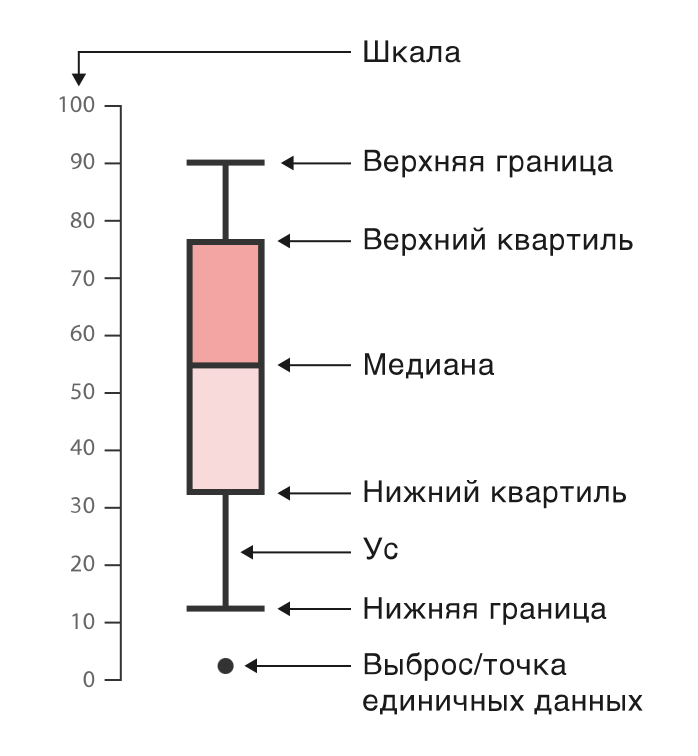